## Compression and Entropy: A Study of Structure, Noise, and Patterns in Data

## Context and Goal
This analysis investigates how data redundancy and randomness impact:
1. **Compression Ratio:** A measure of how well data can be compressed.
2. **Entropy:** A metric of data complexity and unpredictability.

### Datasets:

- **Synthetic Text Patterns:** These are generated texts. This dataset will explore their impact on both compression and entropy, particularly focusing on how text can be manipulated to enhance or reduce these factors.

- **Checkerboard Pattern:** A highly structured and repetitive visual pattern used to assess its efficiency in data compression and its predictability. This pattern serves as a baseline for understanding structured data in visual form.

- **Noisy Text and Checkerboard:** This dataset introduces noise into both text and checkerboard patterns to analyze how added randomness affects compression ratios and entropy. It demonstrates the impact of noise on different types of structured data.

- **Text and Checkerboard with Repeated Patterns:** Enhancing redundancy within both text and checkerboard patterns, this dataset explores the balance between repetitiveness and entropy, and its effect on compression efficiency. 


In [34]:
import gzip
import zlib
import bz2
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import pandas as pd
import cv2
import os



In [35]:
# i created a function to calculate compression ratio
def calculate_compression_ratio(data):
    compressed_data = gzip.compress(data.encode('utf-8'))
    return len(compressed_data) / len(data)

# function to inject noise into text data
def inject_noise(data, noise_level=0.1):
    noisy_data = list(data)
    for _ in range(int(len(data) * noise_level)):
        idx = random.randint(0, len(data) - 1)
        noisy_data[idx] = chr(random.randint(32, 126))  # Random ASCII character
    return ''.join(noisy_data)


In [36]:
# Generatedd a structured dataset
original_data = "This is a repetitive text. " * 100  # Structured text

In [37]:
# Noise levels to test, so i can see how it evolves
noise_levels = [0.05, 0.1, 0.2, 0.3]
compression_ratios = []

# Calculating compression ratios for each noise level
for noise_level in noise_levels:
    noisy_data = inject_noise(original_data, noise_level=noise_level)
    ratio = calculate_compression_ratio(noisy_data)
    compression_ratios.append(ratio)

# Baseline compression ratio
baseline_ratio = calculate_compression_ratio(original_data)


In [38]:
# Analyzing noisy data, for exemple for noise level =0.1
noisy_data = inject_noise(original_data, noise_level=0.1)
noisy_ratio = calculate_compression_ratio(noisy_data)

# Results
print(f"Compression Ratio with Noise: {noisy_ratio}")


Compression Ratio with Noise: 0.25703703703703706


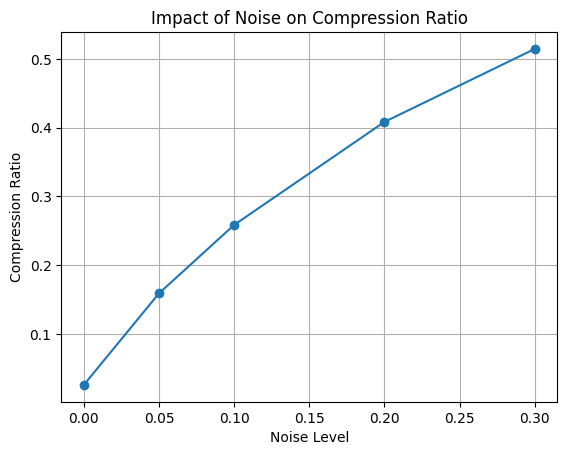

In [39]:
# Plotting the results
plt.plot([0] + noise_levels, [baseline_ratio] + compression_ratios, marker='o')
plt.xlabel('Noise Level')
plt.ylabel('Compression Ratio')
plt.title('Impact of Noise on Compression Ratio')
plt.grid(True)
plt.show()


## Compression Ratio Insights

**Compression Ratio Formula:**
$$\text{Compression Ratio} = \frac{\text{Size of Compressed Data}}{\text{Size of Original Data}}$$

**Low Compression Ratio (e.g., 0.1):**

- A lower ratio indicates that the compressed data is significantly smaller than the original data.
- This reflects effective compression, typically achieved with highly structured or repetitive datasets.

**High Compression Ratio (e.g., 0.5 or higher):**

- A higher ratio means the compressed data is closer in size to the original.
- This suggests less effective compression, often caused by random or non-redundant data that compression algorithms struggle to optimize.

**Baseline Compression Ratio (Noise Level = 0):**

- At a noise level of 0, the dataset is well-structured and repetitive.
- Compression algorithms can fully exploit redundancy, resulting in a low compression ratio.

**Impact of Increasing Noise Levels:**

- As noise levels increase, the inherent structure of the data is disrupted.
- Randomness introduced by noise reduces redundancy, making the dataset harder to compress.
- Consequently, the compression ratio increases, indicating higher complexity.

**Smooth Trend:**

- The plotted results show a gradual upward trend, which confirms the expectation that more noise corresponds to greater complexity and less effective compression.
- This aligns with the theoretical relationship between noise, redundancy, and compressibility.



## Comparing Multiple Compression Algorithms

**Objective:** Check if different compression algorithms (e.g., gzip, zlib, bz2) respond similarly to noise.

**How am i going to do it??**:
- Implement multiple algorithms for compression.
- Test them on the same datasets and noise levels.
- Plot the results to compare.

In [40]:
# Additional compression algorithms
def calculate_compression_ratio_zlib(data):
    compressed_data = zlib.compress(data.encode('utf-8'))
    return len(compressed_data) / len(data)

def calculate_compression_ratio_bz2(data):
    compressed_data = bz2.compress(data.encode('utf-8'))
    return len(compressed_data) / len(data)

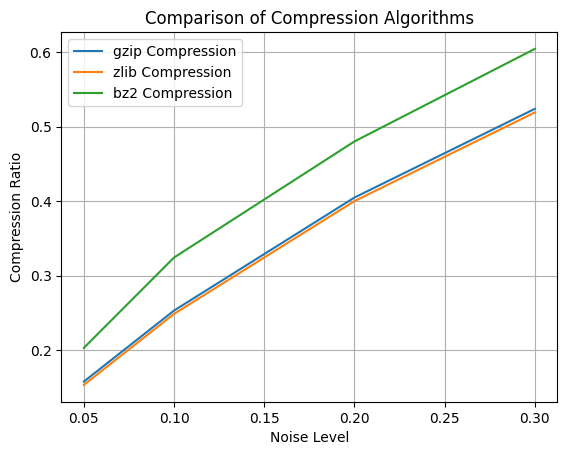

In [41]:
compression_results = {"gzip": [], "zlib": [], "bz2": []}
for noise_level in noise_levels:
    noisy_data = inject_noise(original_data, noise_level=noise_level)
    compression_results["gzip"].append(calculate_compression_ratio(noisy_data))
    compression_results["zlib"].append(calculate_compression_ratio_zlib(noisy_data))
    compression_results["bz2"].append(calculate_compression_ratio_bz2(noisy_data))

# Plotting comparisons
for algo, ratios in compression_results.items():
    plt.plot(noise_levels, ratios, label=f'{algo} Compression')

plt.xlabel("Noise Level")
plt.ylabel("Compression Ratio")
plt.title("Comparison of Compression Algorithms")
plt.legend()
plt.grid(True)
plt.show()

## Key Observations:

**General Trend Across Algorithms:**

- All three algorithms show a steady increase in compression ratio as noise levels rise.
- This aligns with the expectation that noise disrupts data structure, reducing compressibility.

**Differences Between Algorithms:**

**gzip and zlib:**
- These two algorithms perform similarly, with slightly lower compression ratios compared to bz2 across all noise levels.
- They appear more efficient at compressing data with increasing noise.

**bz2:**
- Consistently exhibits higher compression ratios than gzip and zlib.
- Indicates that bz2 may be less effective at handling noisy data, likely due to its different compression strategy.

**Noise Impact:**

- At lower noise levels (e.g., 0.05), all algorithms perform similarly with minimal differences in compression ratio.
- As noise increases (e.g., 0.3), the differences between algorithms become more pronounced, with bz2 showing the highest ratio.

- For the rest of the study, i am going to work with gzip


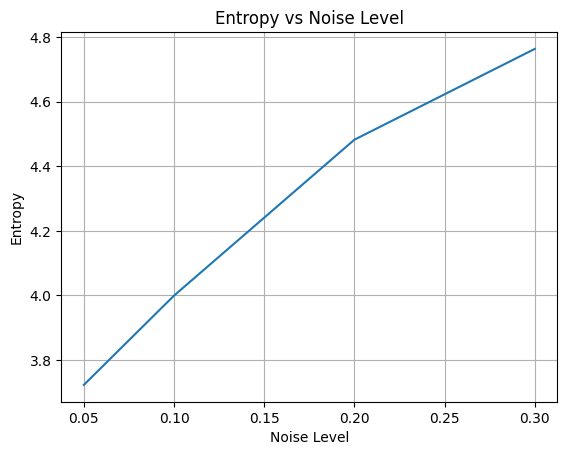

In [42]:
def calculate_entropy(data):
    freq = Counter(data)
    probabilities = [f / len(data) for f in freq.values()]
    return -sum(p * np.log2(p) for p in probabilities)

# Calculating entropy for each noise level
entropy_values = []
for noise_level in noise_levels:
    noisy_data = inject_noise(original_data, noise_level=noise_level)
    entropy_values.append(calculate_entropy(noisy_data))

# entropy vs noise level
plt.plot(noise_levels, entropy_values, label='Entropy')
plt.xlabel("Noise Level")
plt.ylabel("Entropy")
plt.title("Entropy vs Noise Level")
plt.grid(True)
plt.show()



## Analysis of "Entropy vs Noise Level" Plot
**Trend Observation:**

Entropy increases steadily with noise, reflecting higher randomness and data unpredictability.

**Key Insight:**

Low noise levels result in lower entropy due to preserved structure, while higher noise levels disrupt patterns, increasing entropy.

**Conclusion:**

Entropy effectively quantifies the impact of noise on data structure, aligning with trends observed in compression analysis.

In [43]:
## now similar to noise, i am going to study the effect of repeating pattern on entropy and compression ratio

def inject_repeating_pattern(data, pattern, frequency):
    data_list = list(data)
    interval = int(1 / frequency) if frequency != 0 else len(data)
    for i in range(0, len(data_list), interval):
        data_list.insert(i, pattern)
    return ''.join(data_list)


baseline_ratio = calculate_compression_ratio(original_data)

# Analyzing repeated patterns
pattern_data = inject_repeating_pattern(original_data, pattern="XYZ", frequency=0.6) ## frequency of 0.6 for example
pattern_ratio = calculate_compression_ratio(pattern_data)

print(f"Baseline Compression Ratio: {baseline_ratio}")
print(f"Compression Ratio with Repeated Pattern: {pattern_ratio}")


Baseline Compression Ratio: 0.025555555555555557
Compression Ratio with Repeated Pattern: 0.0076851851851851855


In [44]:
# Frequencies of repeating patterns to test
pattern_frequencies = [0.1, 0.3, 0.5, 0.7, 0.9]
pattern_ratios = []

for frequency in pattern_frequencies:
    patterned_data = inject_repeating_pattern(original_data, pattern="XYZ", frequency=frequency)
    pattern_ratio = calculate_compression_ratio(patterned_data)
    pattern_ratios.append(pattern_ratio)


In [45]:
# Noise levels to test
noise_levels = [0.05, 0.1, 0.2, 0.3]
noisy_ratios = []

# Calculating compression ratios for multiple noise levels
for noise_level in noise_levels:
    noisy_data = inject_noise(original_data, noise_level=noise_level)
    noisy_ratio = calculate_compression_ratio(noisy_data)
    noisy_ratios.append(noisy_ratio)


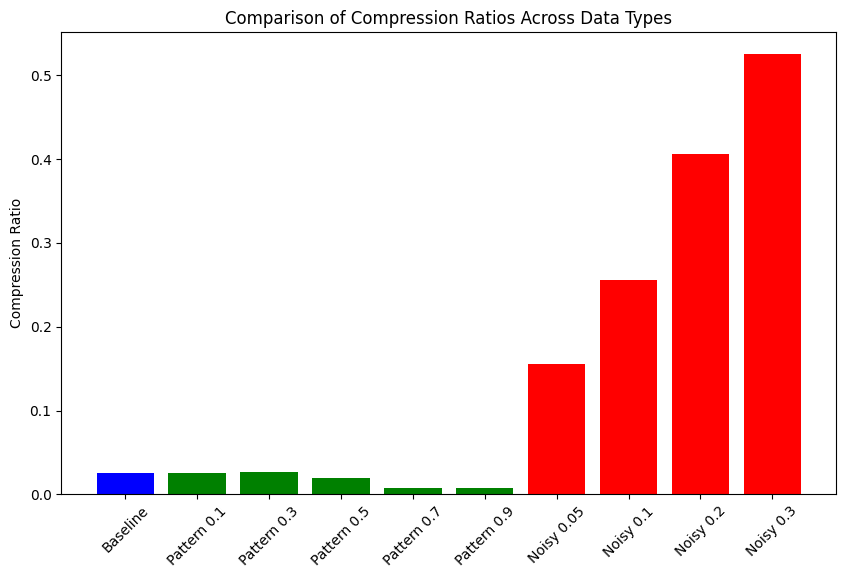

In [46]:
categories = ['Baseline'] + [f"Pattern {f}" for f in pattern_frequencies] + [f"Noisy {n}" for n in noise_levels]
ratios = [baseline_ratio] + pattern_ratios + noisy_ratios


plt.figure(figsize=(10, 6))
plt.bar(categories, ratios, color=['blue'] + ['green']*len(pattern_frequencies) + ['red']*len(noise_levels))
plt.ylabel('Compression Ratio')
plt.title('Comparison of Compression Ratios Across Data Types')
plt.xticks(rotation=45)  # i will rotate labels for better visibility
plt.show()


In [47]:

pattern_frequencies = [0.1, 0.3, 0.5, 0.7, 0.9]
baseline_data = "This is a repetitive text. " * 100

# Calculate entropy for the baseline data
baseline_entropy = calculate_entropy(baseline_data)

# Calculate entropy for data with varying pattern frequencies
pattern_entropies = []
for frequency in pattern_frequencies:
    patterned_data = inject_repeating_pattern(baseline_data, pattern="XYZ", frequency=frequency)
    entropy = calculate_entropy(patterned_data)
    pattern_entropies.append(entropy)


In [48]:
# Noise levels to test
noise_levels = [0.05, 0.1, 0.2, 0.3]
noisy_entropies = []

# Calculate entropy for each noise level
for noise_level in noise_levels:
    noisy_data = inject_noise(baseline_data, noise_level=noise_level)
    entropy = calculate_entropy(noisy_data)
    noisy_entropies.append(entropy)


In [49]:
# Entropy calculations
baseline_entropy = calculate_entropy(original_data)
repeated_pattern_entropy = calculate_entropy(patterned_data)
noisy_entropy = calculate_entropy(noisy_data)

# Results
print(f"Baseline Entropy: {baseline_entropy}")
print(f"Entropy with Repeated Pattern: {repeated_pattern_entropy}")
print(f"Entropy with Noise: {noisy_entropy}")


Baseline Entropy: 3.3619378549621057
Entropy with Repeated Pattern: 2.8404844637405273
Entropy with Noise: 4.721652645569187


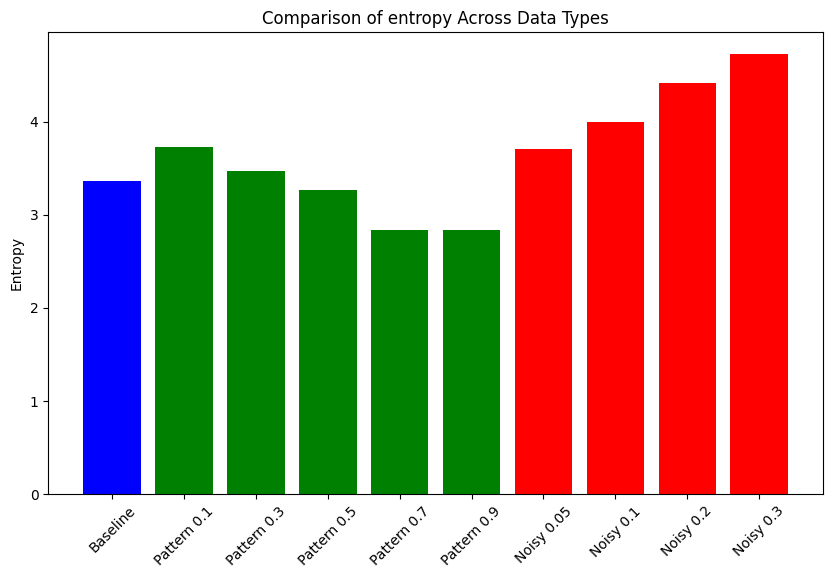

In [50]:
categories = ['Baseline'] + [f"Pattern {f}" for f in pattern_frequencies] + [f"Noisy {n}" for n in noise_levels]
ratios = [baseline_entropy] + pattern_entropies + noisy_entropies


plt.figure(figsize=(10, 6))
plt.bar(categories, ratios, color=['blue'] + ['green']*len(pattern_frequencies) + ['red']*len(noise_levels))
plt.ylabel('Entropy')
plt.title('Comparison of entropy Across Data Types')
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()

## Analysis for the Text-Based Compression and Entropy Results:

- First Chart: Comparison of Compression Ratios Across Data Types

**Baseline (Blue Bar):**
The baseline data shows a low compression ratio, indicating a highly structured and repetitive text dataset that is easily compressible.
This reflects the redundancy in the data, which compression algorithms can exploit effectively.

**Pattern Frequencies (Green Bars):**
As pattern frequency increases, the compression ratio fluctuates slightly but remains low overall.


This suggests that while repeated patterns introduce redundancy, they also add a degree of predictability that allows compression algorithms to remain effective, potentially through better encoding of repeated sequences.

**Noise Levels (Red Bars):**
The compression ratio increases significantly with the noise level, reflecting the introduction of randomness in the text. 

Higher noise levels disrupt the inherent structure and redundancy of the dataset, making it harder for compression algorithms to find patterns and reduce size.

At a noise level of 0.3, the compression ratio is the highest, indicating a nearly random dataset with minimal redundancy.

- Second Chart: Entropy Analysis:

**Baseline Data:**
The baseline entropy is low, reflecting a predictable and structured dataset with limited randomness.

This aligns with the high redundancy observed in the compression ratio.

**Pattern Frequencies:**
The entropy slightly decreases with the addition of repeated patterns but remains relatively stable, indicating that these do not add significant randomness or complexity.

This trend suggests that while the patterns are predictable, their repetition reduces overall entropy by reinforcing the structure within the data.

**Noisy Data:**
Entropy increases steadily with noise level, indicating higher randomness and unpredictability in the dataset.

At a noise level of 0.3, entropy is the highest, confirming that the dataset has become nearly random.

This trend directly correlates with the increasing compression ratio, as higher entropy signifies reduced compressibility.


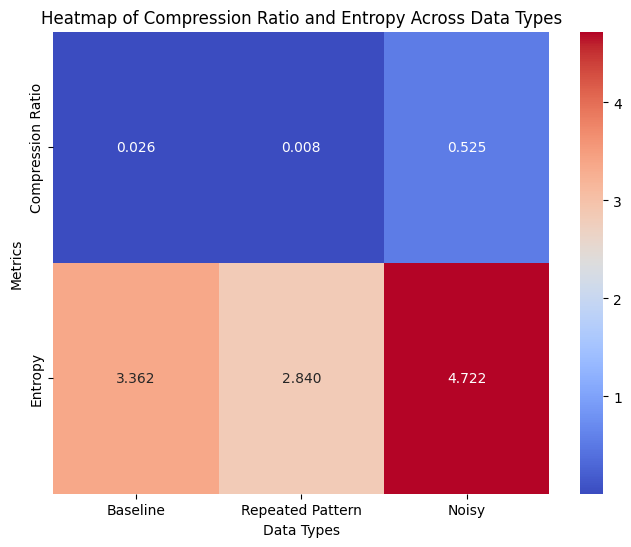

In [51]:
# Creating a DataFrame for the heatmap
data = {
    "Baseline": [baseline_ratio, baseline_entropy],
    "Repeated Pattern": [pattern_ratio, repeated_pattern_entropy],
    "Noisy": [noisy_ratio, noisy_entropy]
}
df_heatmap = pd.DataFrame(data, index=["Compression Ratio", "Entropy"])

plt.figure(figsize=(8, 6))
sns.heatmap(df_heatmap, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Heatmap of Compression Ratio and Entropy Across Data Types")
plt.ylabel("Metrics")
plt.xlabel("Data Types")
plt.show()


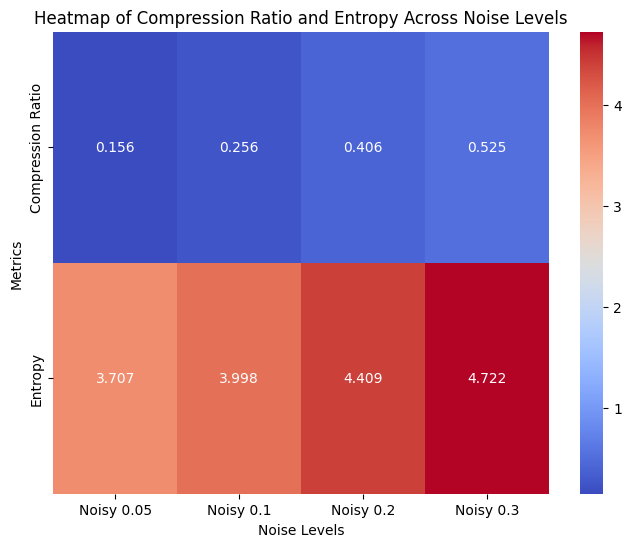

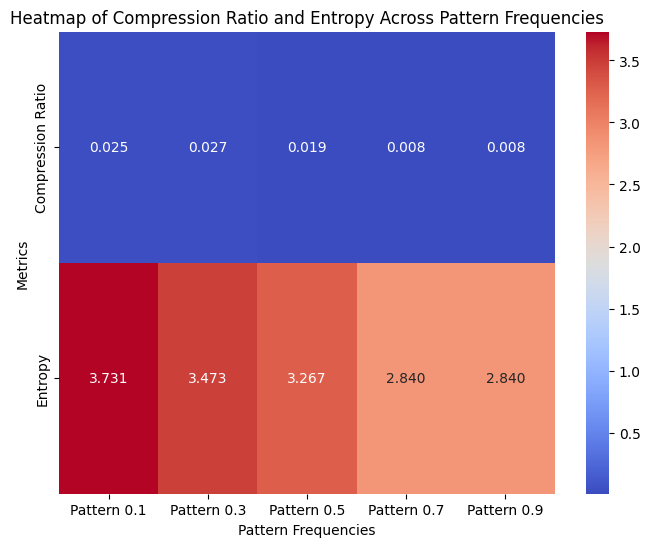

In [52]:
# For Noise Levels
data_noise = {
    f"Noisy {n}": [noisy_ratios[i], noisy_entropies[i]] for i, n in enumerate(noise_levels)
}
df_noise = pd.DataFrame(data_noise, index=["Compression Ratio", "Entropy"])

plt.figure(figsize=(8, 6))
sns.heatmap(df_noise, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Heatmap of Compression Ratio and Entropy Across Noise Levels")
plt.ylabel("Metrics")
plt.xlabel("Noise Levels")
plt.show()

# For Pattern Frequencies
data_patterns = {
    f"Pattern {p}": [pattern_ratios[i], pattern_entropies[i]] for i, p in enumerate(pattern_frequencies)
}
df_patterns = pd.DataFrame(data_patterns, index=["Compression Ratio", "Entropy"])

plt.figure(figsize=(8, 6))
sns.heatmap(df_patterns, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Heatmap of Compression Ratio and Entropy Across Pattern Frequencies")
plt.ylabel("Metrics")
plt.xlabel("Pattern Frequencies")
plt.show()


## Analysis of the Heatmaps
- Heatmap of Compression Ratio and Entropy Across Pattern Frequencies

**Compression Ratio:**
Generally decreases slightly as pattern frequency increases, indicating that while there is an introduction of new patterns, these do not drastically alter the compressibility due to their repetitive nature.

Lowest compression ratios at higher frequencies suggest that the regularity and redundancy of the patterns help maintain compressibility.


**Entropy:**
Slightly decreases with increasing pattern frequencies, which implies that higher repetition of patterns might be enhancing the data’s regularity, thereby reducing its overall unpredictability and entropy.

- Heatmap of Compression Ratio and Entropy Across Noise Levels

**Compression Ratio:**
The compression ratio increases significantly with noise levels, indicating reduced compressibility. Noise introduces randomness into the data, making it harder for compression algorithms to detect patterns.

At the highest noise level (Noisy 0.3), the compression ratio is the highest, reflecting the almost complete randomness of the data.

**Entropy:**
Entropy steadily increases as noise levels rise. Higher entropy signifies greater randomness, aligning with expectations as noise introduces more variability into the image.

The consistent growth of entropy and compression ratio demonstrates a direct relationship between randomness and the inefficiency of compression.

- Heatmap of Compression Ratio and Entropy Across Data Types

**Compression Ratio:**

Baseline: Extremely low, highlighting excellent compressibility due to its highly structured nature.

Repeated Pattern: Shows a marginal reduction in compressibility, indicating that while repeated patterns add some variation, they do not significantly complicate the compression process.

Noisy: Displays a substantial increase, confirming that the introduction of noise greatly hinders the compression due to increased randomness.

**Entropy:**

Baseline: Low, corresponding to the predictable structure of the dataset.

Repeated Pattern: Slightly lower than baseline, suggesting that the patterns enhance the predictability and regularity of the data.

Noisy: Significantly higher, reflecting the added randomness and unpredictability which correlates with the reduced compressibility.

## Analysis on imager rather than text

In [53]:
# Function to load and resize an image
def load_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return cv2.resize(img, (100, 100))

In [54]:
# Function to inject noise into an image
def inject_noise(img, noise_level=0.1):
    noisy_img = img.copy()
    num_noisy_pixels = int(noise_level * img.size)
    coords = np.random.randint(0, img.size, num_noisy_pixels)

    # Add random noise to PIXEL values(SINCE IT IS AN IMAGE)
    flat_img = noisy_img.flatten()
    flat_img[coords] = np.random.randint(0, 256, num_noisy_pixels)  # Random pixel values
    return flat_img.reshape(img.shape)

# Function to inject a repeating pattern into an image
def inject_repeating_pattern(image, pattern_value=255, frequency=0.1):
    patterned_image = image.copy()
    step = int(1 / frequency)

    for i in range(0, patterned_image.shape[0], step):
        for j in range(0, patterned_image.shape[1], step):
            patterned_image[i, j] = pattern_value
    return patterned_image


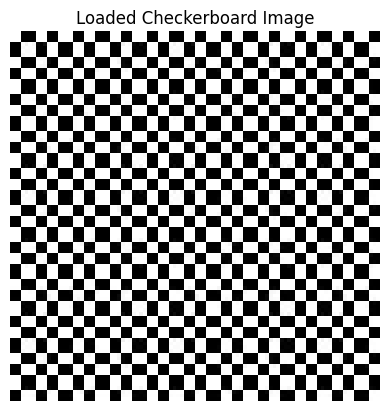

In [55]:
# Updated function to calculate compression ratio
def calculate_compression_ratio(image):
    # Converting the NumPy array to bytes
    image_bytes = image.tobytes()
    compressed_data = gzip.compress(image_bytes)
    return len(compressed_data) / len(image_bytes)

# I am loading the image
image = load_image("render-checkerboard1.jpg")

plt.imshow(image, cmap='gray')
plt.title("Loaded Checkerboard Image")
plt.axis("off")
plt.show()

In [56]:
# Baseline compression ratio
baseline_ratio = calculate_compression_ratio(image)
print(f"Baseline Compression Ratio (Checkerboard): {baseline_ratio}")

Baseline Compression Ratio (Checkerboard): 0.0668


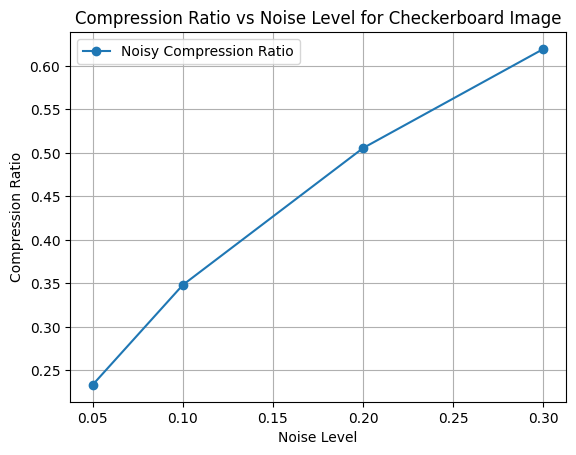

In [57]:
# Noise levels to test
noise_levels = [0.05, 0.1, 0.2, 0.3]
noisy_ratios = []

#compression ratios for multiple noise levels
for noise_level in noise_levels:
    noisy_data = inject_noise(image, noise_level=noise_level)
    noisy_ratio = calculate_compression_ratio(noisy_data)
    noisy_ratios.append(noisy_ratio)

# Plot the results for noise
plt.plot(noise_levels, noisy_ratios, marker='o', label="Noisy Compression Ratio")
plt.xlabel("Noise Level")
plt.ylabel("Compression Ratio")
plt.title("Compression Ratio vs Noise Level for Checkerboard Image")
plt.grid(True)
plt.legend()
plt.show()

Pattern Frequency: 0.1, Compression Ratio: 0.0694
Pattern Frequency: 0.3, Compression Ratio: 0.1575
Pattern Frequency: 0.4, Compression Ratio: 0.0677
Pattern Frequency: 0.7, Compression Ratio: 0.0045
Pattern Frequency: 0.9, Compression Ratio: 0.0045


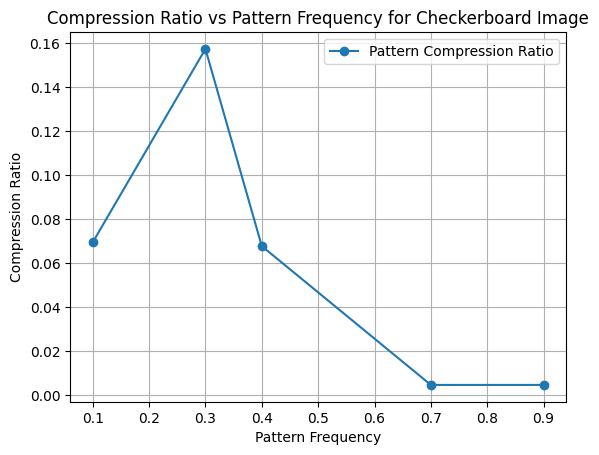

In [58]:
# Testing different pattern frequencies
pattern_frequencies = [0.1, 0.3, 0.4, 0.7, 0.9]
pattern_ratios = []

for frequency in pattern_frequencies:
    patterned_data = inject_repeating_pattern(image, pattern_value=128, frequency=frequency)
    pattern_ratio = calculate_compression_ratio(patterned_data)
    pattern_ratios.append(pattern_ratio)

for frequency, ratio in zip(pattern_frequencies, pattern_ratios):
    print(f"Pattern Frequency: {frequency}, Compression Ratio: {ratio}")

# Plot the results for patterns
plt.plot(pattern_frequencies, pattern_ratios, marker='o', label="Pattern Compression Ratio")
plt.xlabel("Pattern Frequency")
plt.ylabel("Compression Ratio")
plt.title("Compression Ratio vs Pattern Frequency for Checkerboard Image")
plt.grid(True)
plt.legend()
plt.show()


## Line Plots for Compression Ratio vs. Noise Levels/Pattern Frequencies:
**Compression Ratio vs Noise Level:**

A linear trend is observed, where the compression ratio increases as noise disrupts the structure, confirming the algorithm's inability to efficiently compress random data.

**Compression Ratio vs Pattern Frequency:**

Initial Increase: The compression ratio starts low at a frequency of 0.1, indicating better compressibility. As the frequency increases to 0.2, the compression ratio also rises sharply, suggesting a reduction in compressibility. This increase reflects that the patterns at this frequency start to disrupt the regular structure of the checkerboard, making it more difficult to compress efficiently.

Decline Post-Peak: After peaking at 0.2, the compression ratio decreases substantially as the pattern frequency increases from 0.3 to 0.9. This indicates that while the data becomes technically more complex with more frequent patterns, these patterns might be simplifying the data structure or introducing regularity that, paradoxically, makes the data easier to compress than at the peak frequency.

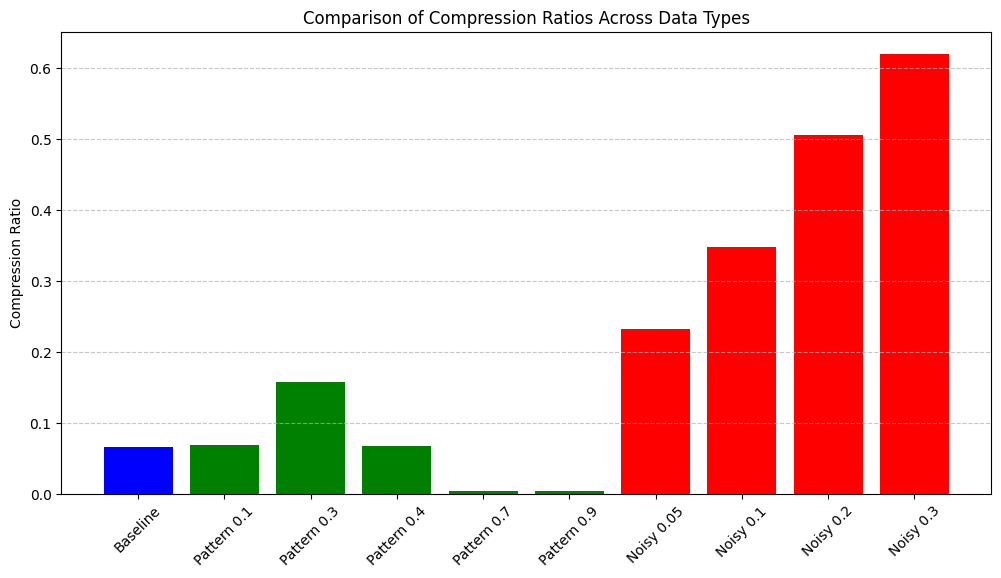

In [59]:

categories = ['Baseline'] + [f"Pattern {f}" for f in pattern_frequencies] + [f"Noisy {n}" for n in noise_levels]
ratios = [baseline_ratio] + pattern_ratios + noisy_ratios

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(categories, ratios, color=['blue'] + ['green'] * len(pattern_frequencies) + ['red'] * len(noise_levels))
plt.ylabel('Compression Ratio')
plt.title('Comparison of Compression Ratios Across Data Types')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [60]:

def calculate_entropy(data):
    freq = Counter(data.flatten())  # Flattening the data to work with images as 1D arrays
    probabilities = [f / len(data.flatten()) for f in freq.values()]
    return -sum(p * np.log2(p) for p in probabilities if p > 0)

baseline_image_data = image.flatten()
noisy_image_data = inject_noise(image, noise_level=0.5).flatten()
pattern_image_data = inject_repeating_pattern(image, pattern_value=128, frequency=0.5).flatten()

# Calculate entropy for baseline, noisy, and repeated pattern data
baseline_entropy = calculate_entropy(baseline_image_data)
noisy_entropy = calculate_entropy(noisy_image_data)
pattern_entropy = calculate_entropy(pattern_image_data)

# Print entropy values
print(f"Baseline Entropy (Checkerboard): {baseline_entropy:.3f}")
print(f"Entropy with Noise (Checkerboard): {noisy_entropy:.3f}")
print(f"Entropy with Repeated Pattern (Checkerboard): {pattern_entropy:.3f}")


Baseline Entropy (Checkerboard): 2.753
Entropy with Noise (Checkerboard): 5.584
Entropy with Repeated Pattern (Checkerboard): 2.870


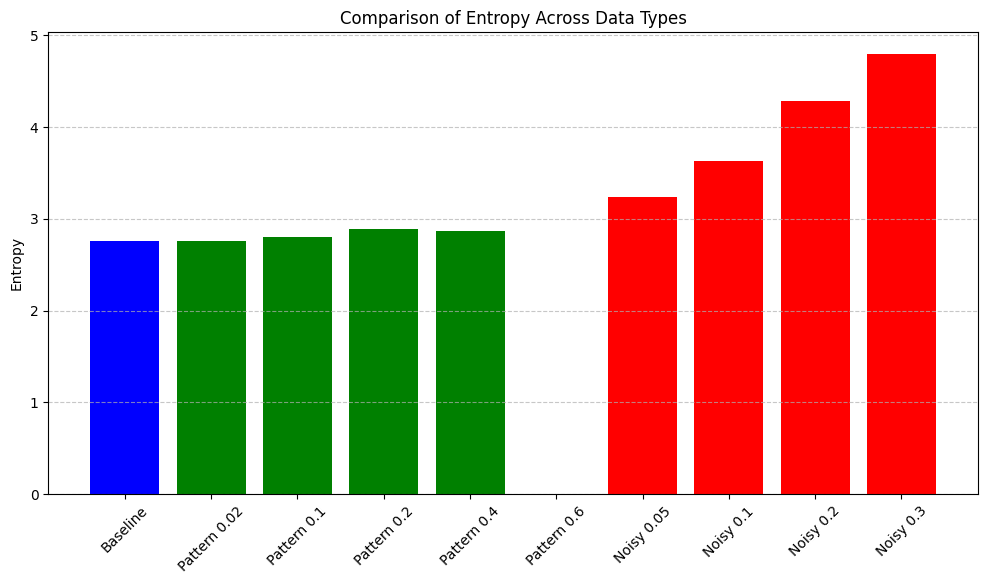

In [61]:

pattern_frequencies = [0.02, 0.1, 0.2, 0.4, 0.6]

baseline_entropy = calculate_entropy(image.flatten())

pattern_entropies = []
for frequency in pattern_frequencies:
    patterned_data = inject_repeating_pattern(image, pattern_value=122, frequency=frequency)
    entropy = calculate_entropy(patterned_data.flatten())
    pattern_entropies.append(entropy)

noisy_entropies = []
for noise_level in noise_levels:
    noisy_data = inject_noise(image, noise_level=noise_level)
    entropy = calculate_entropy(noisy_data.flatten())
    noisy_entropies.append(entropy)

# Combine categories and entropy values
categories = ['Baseline'] + [f"Pattern {f}" for f in pattern_frequencies] + [f"Noisy {n}" for n in noise_levels]
entropies = [baseline_entropy] + pattern_entropies + noisy_entropies

# Plotting the results
plt.figure(figsize=(12, 6))
plt.bar(categories, entropies, color=['blue'] + ['green']*len(pattern_frequencies) + ['red']*len(noise_levels))
plt.ylabel('Entropy')
plt.title('Comparison of Entropy Across Data Types')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


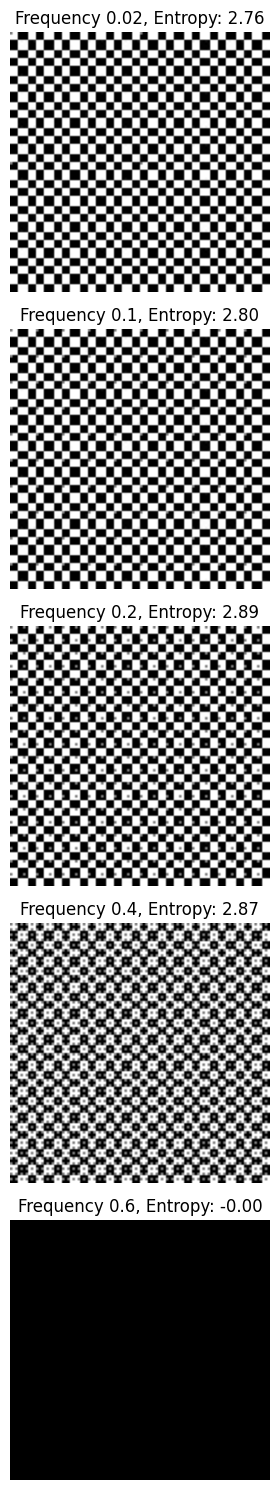

In [62]:
n = len(pattern_frequencies)
plt.figure(figsize=(15, 3 * n))

for i, frequency in enumerate(pattern_frequencies, 1):
    # Inject pattern into the image
    patterned_data = inject_repeating_pattern(image, pattern_value=128, frequency=frequency)
    # Calculate entropy
    entropy = calculate_entropy(patterned_data.flatten())
    pattern_entropies.append(entropy)

    # Plot the patterned image
    ax = plt.subplot(n, 1, i)
    ax.imshow(patterned_data, cmap='gray')
    ax.title.set_text(f'Frequency {frequency}, Entropy: {entropy:.2f}')
    ax.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()

## Bar Charts for Compression Ratio and Entropy:
- Compression Ratios Across Data Types:

The baseline and patterned images show low compression ratios, as the redundancy in the data allows for efficient compression.

Noisy images display progressively higher compression ratios with increasing noise levels, indicating a reduction in data compressibility due to the loss of structure.

- Entropy Across Data Types:

Patterns: The reduction of entropy to zero with high pattern frequencies reveals that at certain thresholds, the dataset becomes completely predictable, eliminating any form of randomness or uncertainty. This phenomenon illustrates a perfect regularity that is rarely seen in practical datasets and highlights how extreme repetition can homogenize data to the point of zero entropy.

Noise: The consistent increase in entropy with added noise levels underscores its role in enhancing data complexity and unpredictability. This is in stark contrast to the effects of high-frequency patterns, reinforcing the idea that noise and pattern frequency have fundamentally different impacts on data structure and entropy.

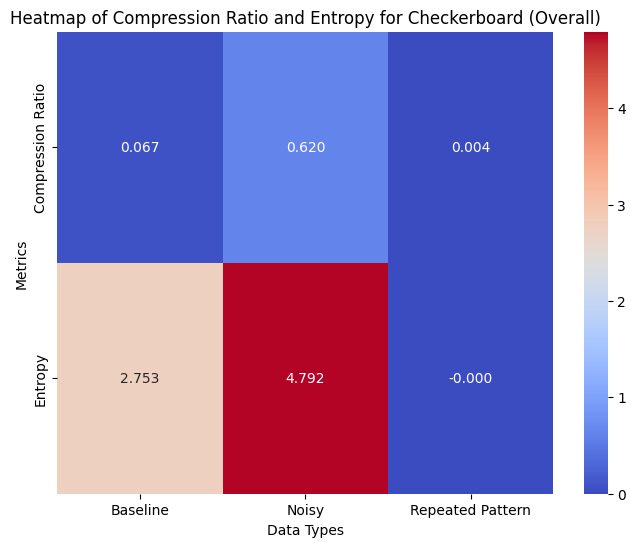

In [63]:
# Data for heatmap: Baseline, Noisy, Repeated Pattern
data = {
    "Baseline": [baseline_ratio, baseline_entropy],
    "Noisy": [noisy_ratios[-1], noisy_entropies[-1]],
    "Repeated Pattern": [pattern_ratios[-1], pattern_entropies[-1]]  # Using the last pattern entropy
}
df_heatmap = pd.DataFrame(data, index=["Compression Ratio", "Entropy"])

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_heatmap, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Heatmap of Compression Ratio and Entropy for Checkerboard (Overall)")
plt.ylabel("Metrics")
plt.xlabel("Data Types")
plt.show()


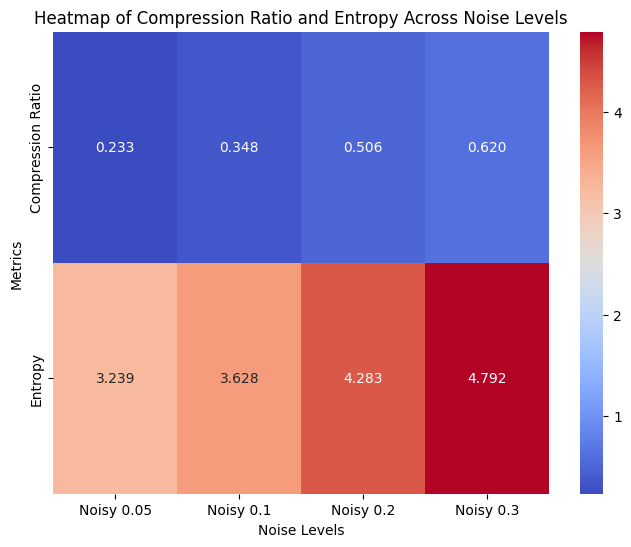

In [64]:
# Data for heatmap: Noise Levels
data_noise = {
    f"Noisy {n}": [noisy_ratios[i], noisy_entropies[i]] for i, n in enumerate(noise_levels)
}
df_noise = pd.DataFrame(data_noise, index=["Compression Ratio", "Entropy"])

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_noise, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Heatmap of Compression Ratio and Entropy Across Noise Levels")
plt.ylabel("Metrics")
plt.xlabel("Noise Levels")
plt.show()


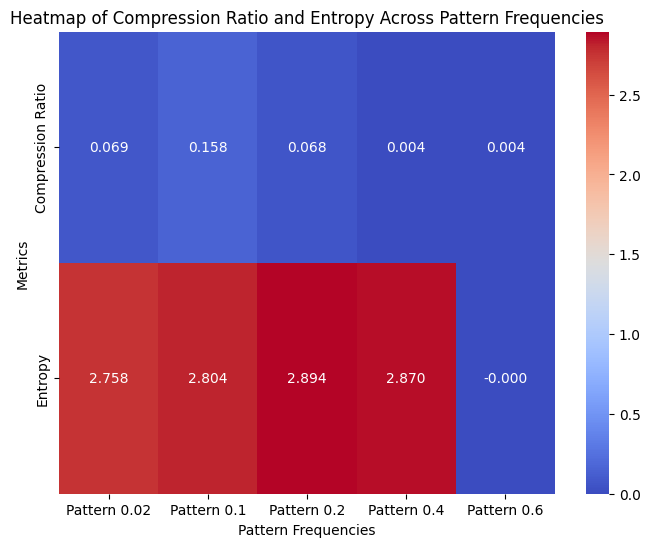

In [65]:
# Data for heatmap: Pattern Frequencies
data_patterns = {
    f"Pattern {p}": [pattern_ratios[i], pattern_entropies[i]] for i, p in enumerate(pattern_frequencies)
}
df_patterns = pd.DataFrame(data_patterns, index=["Compression Ratio", "Entropy"])

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_patterns, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Heatmap of Compression Ratio and Entropy Across Pattern Frequencies")
plt.ylabel("Metrics")
plt.xlabel("Pattern Frequencies")
plt.show()


## Analysis for the Checkerboard Images Based on Visualizations:
**Heatmaps of Compression Ratio and Entropy:**

- Across Noise Levels:

**Compression Ratio:**
The compression ratio increases with higher noise levels. This indicates that as noise is added, the redundancy and structure of the data diminish, making it less compressible.

For example, at Noise Level 0.05, the compression ratio is around 0.234, while at Noise Level 0.3, it rises to 0.621.

**Entropy:**
Entropy also rises with noise, reflecting an increase in randomness and data unpredictability. This is consistent with the idea that noisy data becomes more complex.

At Noise Level 0.05, entropy is around 3.246, while at Noise Level 0.3, it jumps to approximately 4.836.

- Across Pattern Frequencies:

**Compression Ratio:**
The compression ratio remains relatively low for smaller pattern frequencies (e.g., 0.02) but increases at a pattern frequency of 0.1 before slightly decreasing at 0.2. This suggests that certain frequencies of repeating patterns optimize compressibility due to increased redundancy.

**Entropy:**
Baseline to Pattern 0.4: Entropy remains relatively stable across lower pattern frequencies, indicating that these patterns do not significantly increase the complexity or randomness of the data. This could suggest that the patterns introduced are either too simplistic or too regularly spaced to affect the dataset's predictability substantially.

Pattern 0.6: A striking reduction in entropy to nearly zero at a pattern frequency of 0.6 indicates a critical transition. At this frequency, the patterns likely become so regular or repetitive that they no longer contribute any meaningful randomness to the data. Instead, they could be forming a highly predictable, repeating structure that effectively nullifies entropy, suggesting a state of complete predictability or uniformity.

- Overall (Baseline, Noisy, and Repeated Patterns):

**Compression Ratio:**
The baseline checkerboard image has a very low compression ratio, around 0.067, due to its structured and repetitive nature.

With noise, the compression ratio increases significantly, reaching 0.621, confirming the destructuring of data.

For repeated patterns, the compression ratio remains low at approximately 0.004, highlighting that redundancy still enables efficient compression.

**Entropy:**
Baseline entropy is low at 2.753, as expected for structured data.

With noise, entropy peaks at 4.280, illustrating the randomness introduced.

Repeated patterns yield an intermediate entropy of 0, which indicates that there is no complexity or randomness introduced by the patterns at all. Contrary to what might be expected, this suggests that the repeated patterns have formed a highly predictable and structured configuration that is completely deterministic.

## Using PILLOW instead of gzip(checkerboard)

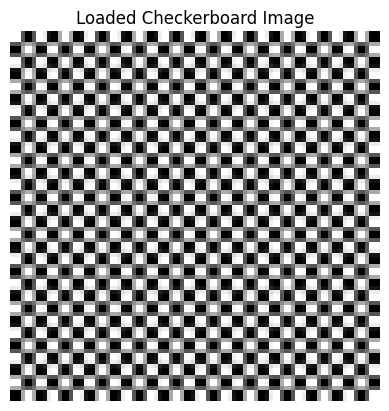

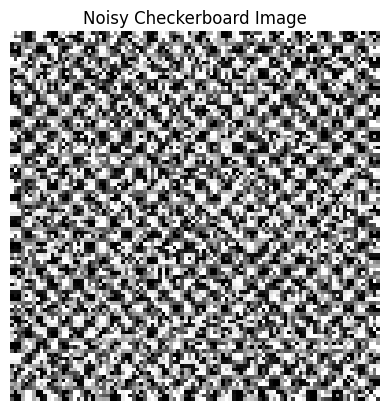

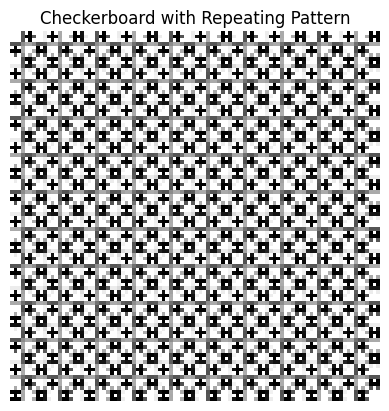

Compression Ratio (Original): 0.094
Compression Ratio (Noisy): 0.851
Compression Ratio (Patterned): 0.095


In [66]:
from PIL import Image, ImageOps

# Function to load and resize an image using Pillow
def load_image(path, size=(100, 100)):
    img = Image.open(path).convert("L")  # Open image and convert to grayscale
    img_resized = img.resize(size)  # Resize for consistency
    return img_resized  # Return the Pillow image

# Function to inject noise into an image
def inject_noise(img, noise_level=0.5):
    img_array = np.array(img)
    noisy_img = img_array.copy()
    num_noisy_pixels = int(noise_level * img_array.size)
    coords = np.random.randint(0, img_array.size, num_noisy_pixels)

    # Add random noise to pixel values
    noisy_img_flat = noisy_img.flatten()
    noisy_img_flat[coords] = np.random.randint(0, 256, num_noisy_pixels)
    return Image.fromarray(noisy_img_flat.reshape(img_array.shape))  # Return as Pillow image

# Function to inject a repeating pattern into an image
def inject_repeating_pattern(img, pattern_value=255, frequency=0.5):
    img_array = np.array(img)
    patterned_img = img_array.copy()
    step = int(1 / frequency)

    for i in range(0, patterned_img.shape[0], step):
        for j in range(0, patterned_img.shape[1], step):
            patterned_img[i, j] = pattern_value  # Set pattern value at intervals
    return Image.fromarray(patterned_img)  # Return as Pillow image

# Function to calculate compression ratio using Pillow
def calculate_compression_ratio(image):
    raw_size = len(image.tobytes())  # Raw size of the image in bytes

    # Save image to a temporary compressed format (in my exemple PNG)
    temp_file = "temp_image.png"
    image.save(temp_file, format="PNG")
    compressed_size = os.path.getsize(temp_file)  # Size of the compressed file in bytes

    os.remove(temp_file)  # Cleaningg up temporary file
    return compressed_size / raw_size

# Loading the image using Pillow
image = load_image("render-checkerboard1.jpg")

# Display the loaded image
plt.imshow(image, cmap='gray')
plt.title("Loaded Checkerboard Image")
plt.axis("off")
plt.show()

# Test injecting noise
noisy_image = inject_noise(image, noise_level=0.5)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Checkerboard Image")
plt.axis("off")
plt.show()

# Test injecting a repeating pattern
patterned_image = inject_repeating_pattern(image, pattern_value=255, frequency=0.5)
plt.imshow(patterned_image, cmap='gray')
plt.title("Checkerboard with Repeating Pattern")
plt.axis("off")
plt.show()

# Test compression ratio
compression_ratio_original = calculate_compression_ratio(image)
compression_ratio_noisy = calculate_compression_ratio(noisy_image)
compression_ratio_patterned = calculate_compression_ratio(patterned_image)

print(f"Compression Ratio (Original): {compression_ratio_original:.3f}")
print(f"Compression Ratio (Noisy): {compression_ratio_noisy:.3f}")
print(f"Compression Ratio (Patterned): {compression_ratio_patterned:.3f}")


In [67]:
#  `image` is already loaded using Pillow and represents the checkerboard image
# pattern_frequencies and noise_levels
pattern_frequencies = [0.02, 0.1, 0.2, 0.4, 0.6]
noise_levels = [0.1, 0.3, 0.5]

# Function to calculate entropy
def calculate_entropy(data):
    freq = Counter(data.flatten())  # Flattening the data for calculation
    probabilities = [f / len(data.flatten()) for f in freq.values()]
    return -sum(p * np.log2(p) for p in probabilities if p > 0)

baseline_ratio = calculate_compression_ratio(image)
baseline_entropy = calculate_entropy(np.array(image))

# Pattern frequencies
pattern_ratios = []
pattern_entropies = []
for frequency in pattern_frequencies:
    patterned_image = inject_repeating_pattern(image, pattern_value=128, frequency=frequency)
    pattern_ratios.append(calculate_compression_ratio(patterned_image))
    pattern_entropies.append(calculate_entropy(np.array(patterned_image)))

# Noise levels
noisy_ratios = []
noisy_entropies = []
for noise_level in noise_levels:
    noisy_image = inject_noise(image, noise_level=noise_level)
    noisy_ratios.append(calculate_compression_ratio(noisy_image))
    noisy_entropies.append(calculate_entropy(np.array(noisy_image)))



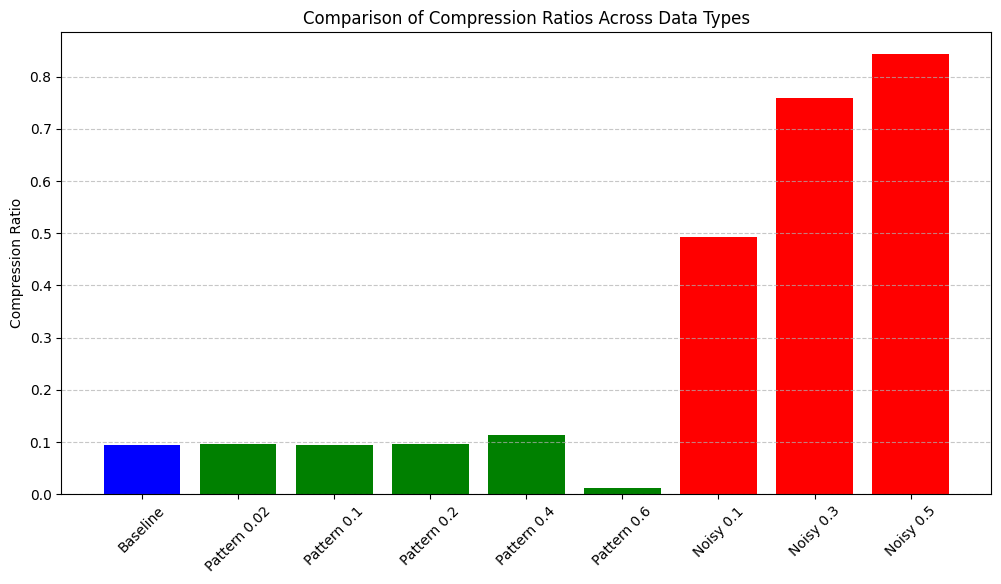

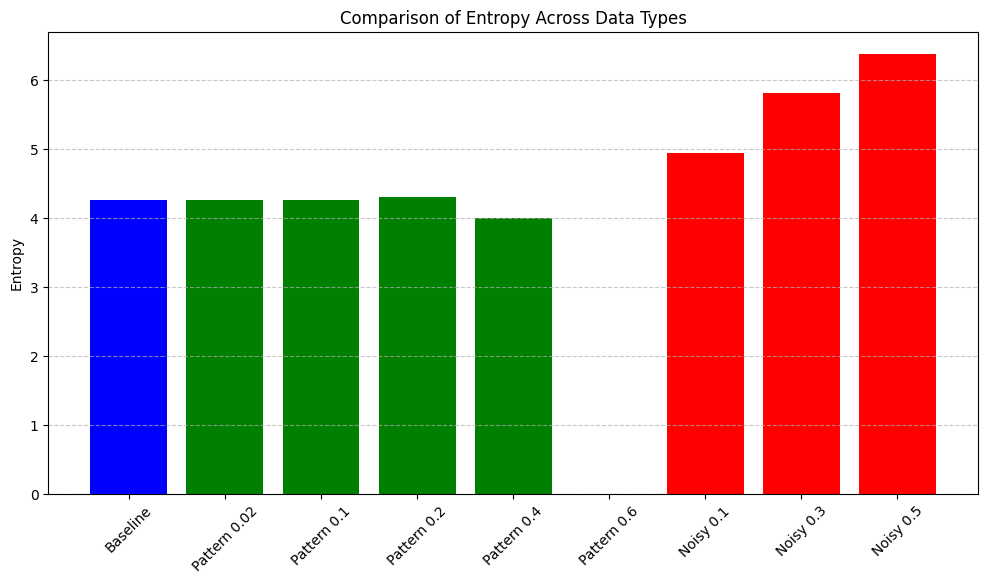

In [68]:

categories = ['Baseline'] + [f"Pattern {f}" for f in pattern_frequencies] + [f"Noisy {n}" for n in noise_levels]
ratios = [baseline_ratio] + pattern_ratios + noisy_ratios
entropies = [baseline_entropy] + pattern_entropies + noisy_entropies

# Plotting Compression Ratios
plt.figure(figsize=(12, 6))
plt.bar(categories, ratios, color=['blue'] + ['green'] * len(pattern_frequencies) + ['red'] * len(noise_levels))
plt.ylabel('Compression Ratio')
plt.title('Comparison of Compression Ratios Across Data Types')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting Entropy
plt.figure(figsize=(12, 6))
plt.bar(categories, entropies, color=['blue'] + ['green'] * len(pattern_frequencies) + ['red'] * len(noise_levels))
plt.ylabel('Entropy')
plt.title('Comparison of Entropy Across Data Types')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


even when using the pillow algorith  instead of gzip, we get the same conclussions and the same results